In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_data.csv')
y = df['poi']
df.drop(['name', 'email_address', 'poi'], axis=1, inplace=True)
df.drop(['loan_advances'], axis=1, inplace=True)
print(df.shape)
df.head(5)

(113, 18)


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,19794175.0,46950.0,18.0,42.0,4.0,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,1624396.0,22884.0,39.0,13.0,14.0,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,NaN,35818.0,144.0,199.0,25.0,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [3]:
fin_features = ['salary', 'deferral_payments', 'total_payments', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'director_fees',
                'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock']
email_features = ['to_messages', 'from_poi_to_this_person', 'from_messages', 
                  'from_this_person_to_poi', 'shared_receipt_with_poi']

In [4]:
y.value_counts()

False    100
True      13
Name: poi, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bonus                      61 non-null     float64
 1   deferral_payments          28 non-null     float64
 2   deferred_income            34 non-null     float64
 3   director_fees              13 non-null     float64
 4   exercised_stock_options    81 non-null     float64
 5   expenses                   73 non-null     float64
 6   from_messages              65 non-null     float64
 7   from_poi_to_this_person    65 non-null     float64
 8   from_this_person_to_poi    65 non-null     float64
 9   long_term_incentive        49 non-null     float64
 10  other                      69 non-null     float64
 11  restricted_stock           82 non-null     float64
 12  restricted_stock_deferred  10 non-null     float64
 13  salary                     73 non-null     float64

In [6]:
df.drop(['deferral_payments', 'deferred_income', 'director_fees', 'restricted_stock_deferred'], axis=1, inplace=True)
df.head(5)

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,19794175.0,46950.0,18.0,42.0,4.0,1617011.0,174839.0,2748364.0,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,19250000.0,29336.0,108.0,88.0,30.0,1920000.0,22122.0,6843672.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,1624396.0,22884.0,39.0,13.0,14.0,NaN,1573324.0,869220.0,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,118134.0,NaN,NaN,NaN,602671.0,907502.0,985032.0,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,35818.0,144.0,199.0,25.0,375304.0,486.0,126027.0,240189.0,2188.0,2598.0,1639297.0,126027.0


In [7]:
fin_ratio_cols = ['bonus', 'expenses', 'other', 'salary']

for col in fin_ratio_cols:
    df[col + '_ratio'] = df[col] / df['total_payments']

df['to_poi_ratio'] = df['from_poi_to_this_person'] / df['to_messages']
df['from_poi_ratio'] = df['from_this_person_to_poi'] / df['from_messages']
df2 = df.copy()
df

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,bonus_ratio,expenses_ratio,other_ratio,salary_ratio,to_poi_ratio,from_poi_ratio
0,1750000.0,19794175.0,46950.0,18.0,42.0,4.0,1617011.0,174839.0,2748364.0,420636.0,864.0,905.0,505050.0,22542539.0,3.465003,0.092961,0.346182,0.832860,0.046409,0.222222
1,5600000.0,19250000.0,29336.0,108.0,88.0,30.0,1920000.0,22122.0,6843672.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0,0.644959,0.003379,0.002548,0.127985,0.024262,0.277778
2,200000.0,1624396.0,22884.0,39.0,13.0,14.0,NaN,1573324.0,869220.0,211844.0,91.0,225.0,2003885.0,2493616.0,0.099806,0.011420,0.785137,0.105717,0.057778,0.358974
3,800000.0,NaN,118134.0,NaN,NaN,NaN,602671.0,907502.0,985032.0,224305.0,NaN,NaN,2652612.0,985032.0,0.301590,0.044535,0.342116,0.084560,NaN,NaN
4,1250000.0,NaN,35818.0,144.0,199.0,25.0,375304.0,486.0,126027.0,240189.0,2188.0,2598.0,1639297.0,126027.0,0.762522,0.021850,0.000296,0.146520,0.076597,0.173611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,500000.0,NaN,16514.0,NaN,NaN,NaN,NaN,356071.0,511734.0,239502.0,NaN,NaN,1112087.0,511734.0,0.449605,0.014850,0.320183,0.215363,NaN,NaN
109,NaN,NaN,49288.0,41.0,13.0,1.0,NaN,NaN,NaN,NaN,761.0,1486.0,49288.0,NaN,NaN,1.000000,NaN,NaN,0.008748,0.024390
110,300000.0,28798.0,31653.0,67.0,7.0,0.0,NaN,NaN,NaN,655037.0,728.0,898.0,1386690.0,28798.0,0.216343,0.022826,NaN,0.472375,0.007795,0.000000
111,NaN,NaN,475.0,19.0,4.0,7.0,NaN,NaN,2217299.0,NaN,471.0,573.0,475.0,2217299.0,NaN,1.000000,NaN,NaN,0.006981,0.368421


In [8]:
# 檢查 DataFrame 空缺值的狀態
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    
    return missing_data
    
miss_ratio_df = na_check(df)
miss_ratio_df

,Missing Ratio
long_term_incentive,56.637168
bonus,46.017699
bonus_ratio,46.017699
to_poi_ratio,42.477876
to_messages,42.477876
shared_receipt_with_poi,42.477876
from_this_person_to_poi,42.477876
from_poi_to_this_person,42.477876
from_messages,42.477876
from_poi_ratio,42.477876


In [9]:
def groupencoder(df, cols):
    for col in cols:
        per_25 = np.nanpercentile(df[col], 25)
        per_50 = np.nanpercentile(df[col], 50)
        per_75 = np.nanpercentile(df[col], 75)
        
        for index, row in df.iterrows():
            if pd.isnull(row[col]) == False:
                if row[col] > per_50:
                    if row[col] > per_75:
                        df.loc[index, col] = 4
                    else:
                        df.loc[index, col] = 3
                else:
                    if row[col] > per_25:
                        df.loc[index, col] = 2
                    else:
                        df.loc[index, col] = 1
                        
    new_df = df.fillna(0)
    return new_df

In [10]:
discretizing_features = list(miss_ratio_df.index)[0:-4]
df = groupencoder(df, discretizing_features)
df

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,bonus_ratio,expenses_ratio,other_ratio,salary_ratio,to_poi_ratio,from_poi_ratio
0,4.0,19794175.0,3.0,1.0,3.0,2.0,4.0,3.0,2748364.0,4.0,3.0,2.0,505050.0,22542539.0,4.0,4.0,4.0,4.0,3.0,3.0
1,4.0,19250000.0,2.0,3.0,3.0,4.0,4.0,2.0,6843672.0,4.0,4.0,4.0,8682716.0,26093672.0,4.0,1.0,2.0,2.0,2.0,4.0
2,1.0,1624396.0,2.0,2.0,2.0,3.0,0.0,4.0,869220.0,2.0,1.0,1.0,2003885.0,2493616.0,1.0,1.0,4.0,2.0,4.0,4.0
3,3.0,0.0,4.0,0.0,0.0,0.0,3.0,4.0,985032.0,2.0,0.0,0.0,2652612.0,985032.0,1.0,3.0,4.0,1.0,0.0,0.0
4,4.0,0.0,2.0,3.0,4.0,3.0,2.0,1.0,126027.0,2.0,4.0,3.0,1639297.0,126027.0,4.0,2.0,1.0,2.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,511734.0,2.0,0.0,0.0,1112087.0,511734.0,2.0,1.0,3.0,3.0,0.0,0.0
109,0.0,0.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0,3.0,49288.0,0.0,0.0,4.0,0.0,0.0,1.0,2.0
110,1.0,28798.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,4.0,3.0,2.0,1386690.0,28798.0,1.0,2.0,0.0,4.0,1.0,1.0
111,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,2217299.0,0.0,2.0,2.0,475.0,2217299.0,0.0,4.0,0.0,0.0,1.0,4.0


In [11]:
remain_features = list(df.drop(discretizing_features, axis=1).columns)
df[remain_features] = np.log1p(df[remain_features])
df

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,bonus_ratio,expenses_ratio,other_ratio,salary_ratio,to_poi_ratio,from_poi_ratio
0,4.0,16.800898,3.0,1.0,3.0,2.0,4.0,3.0,14.826517,4.0,3.0,2.0,13.132415,16.930915,4.0,4.0,4.0,4.0,3.0,3.0
1,4.0,16.773022,2.0,3.0,3.0,4.0,4.0,2.0,15.738835,4.0,4.0,4.0,15.976845,17.077203,4.0,1.0,2.0,2.0,2.0,4.0
2,1.0,14.300647,2.0,2.0,2.0,3.0,0.0,4.0,13.675353,2.0,1.0,1.0,14.510599,14.729245,1.0,1.0,4.0,2.0,4.0,4.0
3,3.0,0.000000,4.0,0.0,0.0,0.0,3.0,4.0,13.800430,2.0,0.0,0.0,14.791056,13.800430,1.0,3.0,4.0,1.0,0.0,0.0
4,4.0,0.000000,2.0,3.0,4.0,3.0,2.0,1.0,11.744259,2.0,4.0,3.0,14.309779,11.744259,4.0,2.0,1.0,2.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2.0,0.000000,1.0,0.0,0.0,0.0,0.0,3.0,13.145562,2.0,0.0,0.0,13.921750,13.145562,2.0,1.0,3.0,3.0,0.0,0.0
109,0.0,0.000000,3.0,2.0,2.0,2.0,0.0,0.0,0.000000,0.0,3.0,3.0,10.805456,0.000000,0.0,4.0,0.0,0.0,1.0,2.0
110,1.0,10.268096,2.0,3.0,1.0,1.0,0.0,0.0,0.000000,4.0,3.0,2.0,14.142431,10.268096,1.0,2.0,0.0,4.0,1.0,1.0
111,0.0,0.000000,1.0,1.0,1.0,2.0,0.0,0.0,14.611801,0.0,2.0,2.0,6.165418,14.611801,0.0,4.0,0.0,0.0,1.0,4.0


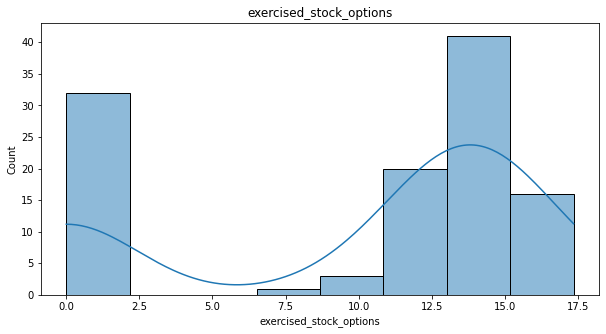

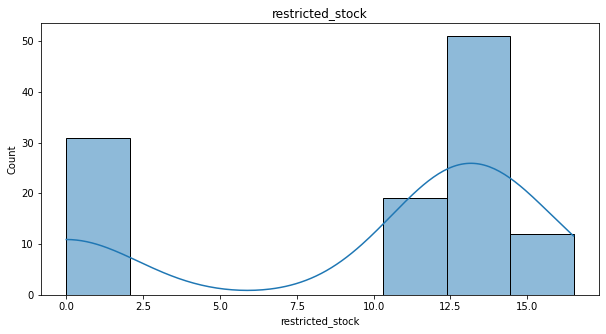

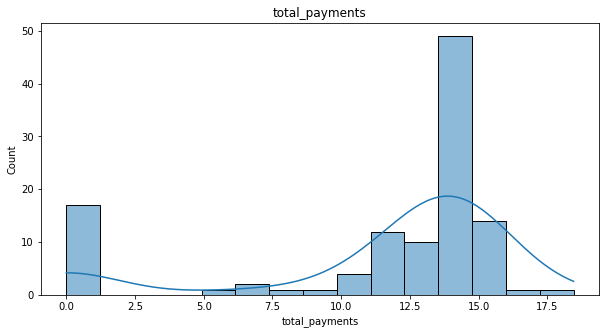

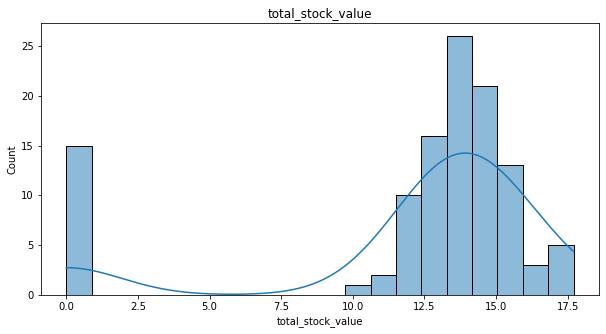

In [12]:
for col in remain_features:
    plt.figure(figsize=(10,5))
    plt.title(col)
    sns.histplot(df[col], kde=True)

In [13]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
df[remain_features] = std.fit_transform(df[remain_features])
df

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,bonus_ratio,expenses_ratio,other_ratio,salary_ratio,to_poi_ratio,from_poi_ratio
0,4.0,1.100134,3.0,1.0,3.0,2.0,4.0,3.0,0.869802,4.0,3.0,2.0,0.342422,0.968380,4.0,4.0,4.0,4.0,3.0,3.0
1,4.0,1.095738,2.0,3.0,3.0,4.0,4.0,2.0,1.022028,4.0,4.0,4.0,0.896534,0.997908,4.0,1.0,2.0,2.0,2.0,4.0
2,1.0,0.705795,2.0,2.0,2.0,3.0,0.0,4.0,0.677724,2.0,1.0,1.0,0.610900,0.523983,1.0,1.0,4.0,2.0,4.0,4.0
3,3.0,-1.549700,4.0,0.0,0.0,0.0,3.0,4.0,0.698594,2.0,0.0,0.0,0.665535,0.336506,1.0,3.0,4.0,1.0,0.0,0.0
4,4.0,-1.549700,2.0,3.0,4.0,3.0,2.0,1.0,0.355511,2.0,4.0,3.0,0.571779,-0.078522,4.0,2.0,1.0,2.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2.0,-1.549700,1.0,0.0,0.0,0.0,0.0,3.0,0.589326,2.0,0.0,0.0,0.496189,0.204324,2.0,1.0,3.0,3.0,0.0,0.0
109,0.0,-1.549700,3.0,2.0,2.0,2.0,0.0,0.0,-1.604084,0.0,3.0,3.0,-0.110884,-2.449047,0.0,4.0,0.0,0.0,1.0,2.0
110,1.0,0.069782,2.0,3.0,1.0,1.0,0.0,0.0,-1.604084,4.0,3.0,2.0,0.539179,-0.376479,1.0,2.0,0.0,4.0,1.0,1.0
111,0.0,-1.549700,1.0,1.0,1.0,2.0,0.0,0.0,0.833976,0.0,2.0,2.0,-1.014792,0.500277,0.0,4.0,0.0,0.0,1.0,4.0


In [14]:
df.to_csv('丟棄過低、中離散化、高補0標準化.csv')

In [16]:
df2 = groupencoder(df, list(df2.columns))
df2.to_csv('全離群化.csv')